In [2]:
from results_loader import load_data
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Reset_index makes a column called "index" with the column index
df = load_data('nontesting_most_downloads').reset_index()

In [4]:
def maybe_dictionary_len(d):
    if d != None:
        num_non_link = 0
        for k in d:
            dep_data = d[k]
            if not ("link" in dep_data and dep_data["link"]):
                num_non_link = num_non_link + 1
        return num_non_link
    else:
        return np.nan
        
df['npm_number_deps'] = df['npm solve'].apply(maybe_dictionary_len)
df['rosette_number_deps'] = df['rosette solve'].apply(maybe_dictionary_len)

In [5]:
df['ratio_num_deps'] = df['rosette_number_deps']/df['npm_number_deps']

In [6]:
df['ratio'] = df['rosette time'] / df['npm time']

In [7]:
df

,index,project_name,npm success,npm time,npm solve,npm error,rosette success,rosette time,rosette solve,rosette error,npm_number_deps,rosette_number_deps,ratio_num_deps,ratio
0,0,supports-color,True,17.038827,"{'node_modules/has-flag': {'version': '5.0.1',...",None,True,2.670986,"{'node_modules/has-flag': {'version': '5.0.0',...",None,1.0,1.0,1.0,0.156759
1,1,debug,True,16.933676,"{'node_modules/ms': {'version': '2.1.2', 'reso...",None,True,2.351109,"{'node_modules/ms': {'version': '2.1.2', 'inte...",None,1.0,1.0,1.0,0.138842
2,2,semver,True,4.659977,{'node_modules/lru-cache': {'version': '6.0.0'...,None,True,2.381426,{'node_modules/lru-cache': {'version': '6.0.0'...,None,2.0,2.0,1.0,0.511038
3,3,chalk,True,10.882163,{'node_modules/ansi-styles': {'version': '4.3....,None,True,3.595008,{'node_modules/ansi-styles': {'version': '4.1....,None,5.0,5.0,1.0,0.330358
4,4,ms,True,4.156216,{},None,True,2.125782,{},None,0.0,0.0,NaN,0.511471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,is-directory,True,2.906567,{},None,True,2.175580,{},None,0.0,0.0,NaN,0.748505
996,996,whatwg-fetch,True,6.489405,{},None,True,2.130667,{},None,0.0,0.0,NaN,0.328330
997,997,decimal.js,True,0.400362,{},None,True,2.159171,{},None,0.0,0.0,NaN,5.393040
998,998,lodash.merge,True,0.394715,{},None,True,2.119727,{},None,0.0,0.0,NaN,5.370275


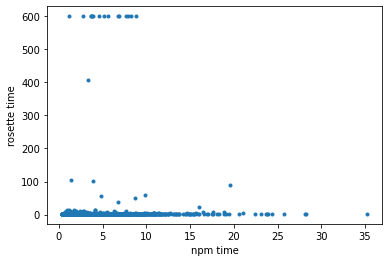

In [8]:
plt.scatter(x=df['npm time'], y=df['rosette time'], marker='.')
plt.xlabel('npm time') #x label
plt.ylabel('rosette time') #y label
plt.show()

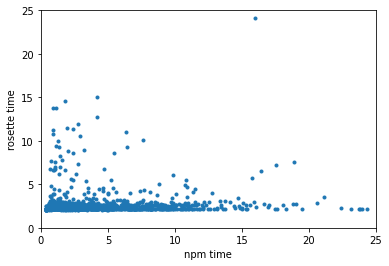

In [9]:
plt.scatter(x=df['npm time'], y=df['rosette time'], marker='.')
plt.xlabel('npm time') #x label
plt.ylabel('rosette time') #y label
plt.ylim([0, 25])
plt.xlim([0, 25])
plt.show()

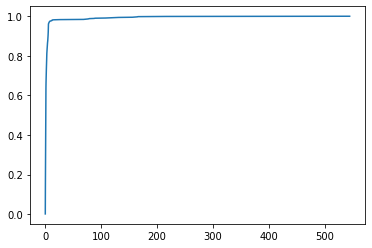

In [10]:
plt.plot(np.sort(df['ratio']), np.arange(1, len(df)+1)/len(df))
plt.show()

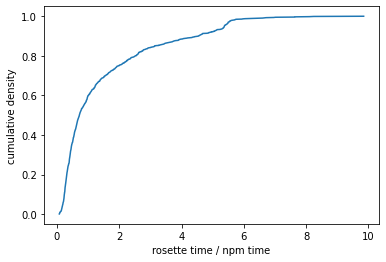

In [11]:
non_outlier_ratio = df['ratio'][df['ratio'] < 10]

plt.plot(np.sort(non_outlier_ratio), np.arange(1, len(non_outlier_ratio)+1)/len(non_outlier_ratio))
plt.xlabel('rosette time / npm time')
plt.ylabel('cumulative density')
plt.show()

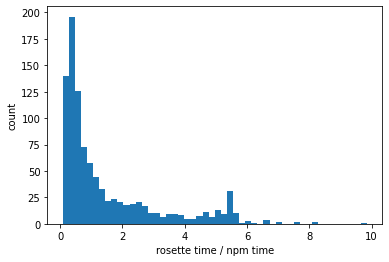

In [12]:
plt.hist(non_outlier_ratio, bins=50)
plt.xlabel('rosette time / npm time')
plt.ylabel('count')
plt.show()

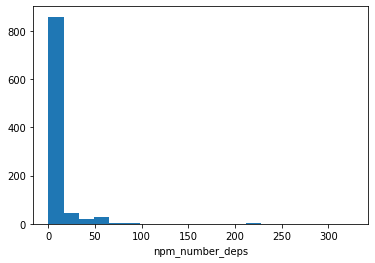

In [13]:
plt.hist(df['npm_number_deps'], bins=20)
plt.xlabel('npm_number_deps');

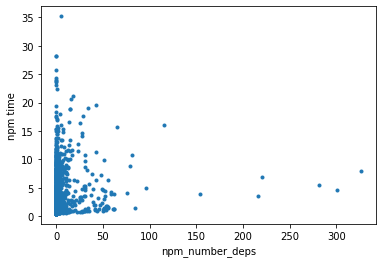

In [14]:
plt.scatter(x=df['npm_number_deps'], y=df['npm time'], marker='.')
plt.xlabel('npm_number_deps') #x label
plt.ylabel('npm time') #y label
plt.show()

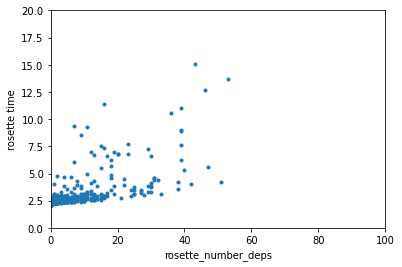

In [15]:
plt.scatter(x=df['rosette_number_deps'], y=df['rosette time'], marker='.')
plt.xlabel('rosette_number_deps') #x label
plt.ylabel('rosette time') #y label
plt.xlim([0, 100])
plt.ylim([0, 20])
plt.show()

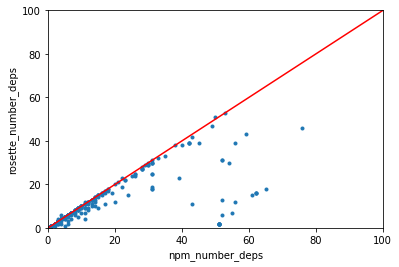

In [16]:
plt.scatter(x=df['npm_number_deps'], y=df['rosette_number_deps'], marker='.')
plt.plot([0, 100], [0, 100], color='r')
plt.xlabel('npm_number_deps') #x label
plt.ylabel('rosette_number_deps') #y label
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

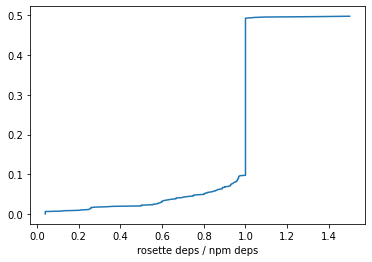

In [17]:
plt.plot(np.sort(df['ratio_num_deps']), np.arange(1, len(df['ratio_num_deps'])+1)/len(df['ratio_num_deps']))
plt.xlabel('rosette deps / npm deps')
plt.show()

In [18]:
df[(df['rosette success'] == True) & df['npm success'] == False].sort_values('npm_number_deps')

,index,project_name,npm success,npm time,npm solve,npm error,rosette success,rosette time,rosette solve,rosette error,npm_number_deps,rosette_number_deps,ratio_num_deps,ratio
50,50,fs-extra,True,8.549419,{'node_modules/graceful-fs': {'version': '4.2....,None,False,2.184626,None,"{'stage': 'install', 'command': 'npm install -...",3.0,NaN,NaN,0.255529
280,280,dom-serializer,True,4.732515,{'node_modules/domelementtype': {'version': '2...,None,False,2.176780,None,"{'stage': 'install', 'command': 'npm install -...",3.0,NaN,NaN,0.459963
295,295,terser,True,4.052353,{'node_modules/buffer-from': {'version': '1.1....,None,False,2.201325,None,"{'stage': 'install', 'command': 'npm install -...",5.0,NaN,NaN,0.543221
441,441,htmlparser2,True,3.553952,{'node_modules/dom-serializer': {'version': '1...,None,False,2.309703,None,"{'stage': 'install', 'command': 'npm install -...",6.0,NaN,NaN,0.649897
482,482,unset-value,True,1.430401,{'node_modules/get-value': {'version': '3.0.1'...,None,False,2.180292,None,"{'stage': 'install', 'command': 'npm install -...",6.0,NaN,NaN,1.524252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,824,@jest/core,False,8.237689,None,"{'stage': 'install', 'command': 'npm install -...",False,600.102435,None,"{'stage': 'install timeout', 'command': 'npm i...",NaN,NaN,NaN,72.848392
834,834,saxes,False,9.331648,None,"{'stage': 'install', 'command': 'npm install -...",True,2.556051,"{'node_modules/xmlchars': {'version': '2.2.0',...",None,NaN,1.0,NaN,0.273912
894,894,date-fns,False,9.320607,None,"{'stage': 'install', 'command': 'npm install -...",True,2.196286,{},None,NaN,0.0,NaN,0.235638
981,981,@tootallnate/once,False,3.258787,None,"{'stage': 'install', 'command': 'npm install -...",True,2.157504,{},None,NaN,0.0,NaN,0.662057


In [19]:
df[df['npm_number_deps'] > df['rosette_number_deps']]

,index,project_name,npm success,npm time,npm solve,npm error,rosette success,rosette time,rosette solve,rosette error,npm_number_deps,rosette_number_deps,ratio_num_deps,ratio
55,55,@babel/code-frame,True,1.803643,{'node_modules/@babel/helper-validator-identif...,None,True,2.998597,{'node_modules/@babel/highlight': {'version': ...,None,10.0,9.0,0.900000,1.662523
61,61,parse-json,True,10.091618,{'node_modules/@babel/code-frame': {'version':...,None,True,3.885285,{'node_modules/@babel/code-frame': {'version':...,None,15.0,14.0,0.933333,0.385001
67,67,globby,True,12.752496,{'node_modules/@nodelib/fs.scandir': {'version...,None,True,3.979715,{'node_modules/array-union': {'version': '3.0....,None,23.0,22.0,0.956522,0.312073
117,117,@babel/highlight,True,1.389981,{'node_modules/@babel/helper-validator-identif...,None,True,2.631417,{'node_modules/@babel/helper-validator-identif...,None,9.0,8.0,0.888889,1.893131
126,126,@babel/traverse,True,3.349207,{'node_modules/@babel/code-frame': {'version':...,None,True,3.441616,{'node_modules/@babel/code-frame': {'version':...,None,25.0,24.0,0.960000,1.027591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,964,@babel/plugin-transform-react-jsx,True,1.607240,{'node_modules/@babel/code-frame': {'version':...,None,True,2.762375,{'node_modules/@babel/helper-annotate-as-pure'...,None,55.0,7.0,0.127273,1.718707
965,965,stream-each,True,6.713148,{'node_modules/end-of-stream': {'version': '1....,None,True,2.645430,{'node_modules/end-of-stream': {'version': '1....,None,4.0,3.0,0.750000,0.394067
975,975,fs-write-stream-atomic,True,6.791186,{'node_modules/core-util-is': {'version': '1.0...,None,True,37.668774,{'node_modules/graceful-fs': {'version': '4.1....,None,11.0,4.0,0.363636,5.546715
985,985,sockjs-client,True,16.630833,"{'node_modules/debug': {'version': '3.2.7', 'r...",None,True,2.777426,"{'node_modules/debug': {'version': '3.2.6', 'i...",None,14.0,12.0,0.857143,0.167005


In [20]:
df[(df['npm success'] == False)].shape

(34, 14)

In [21]:
(df['ratio'] > 10).sum()

24

In [22]:
df['ratio'].sort_values()

334      0.075802
293      0.075819
45       0.086009
875      0.087352
910      0.089996
          ...    
763    160.956256
736    164.756607
818    166.076967
976    216.256688
668    544.692321
Name: ratio, Length: 1000, dtype: float64

In [23]:
(df['ratio_num_deps'] < 1).sum()

97

In [24]:
(df['npm_number_deps'] <= 1).sum()

575

In [25]:
df['ratio_num_deps'].sort_values()

877    0.039216
687    0.039216
624    0.039216
521    0.039216
592    0.039216
         ...   
994         NaN
995         NaN
996         NaN
997         NaN
998         NaN
Name: ratio_num_deps, Length: 1000, dtype: float64